In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [55]:
data = pd.read_csv('/content/xrpusd copy.csv', date_parser = True)
data.tail()

,time,open,close,high,low,volume
1125223,1575246840000,0.22570,0.22611,0.22614,0.22570,21888.422947
1125224,1575246900000,0.22639,0.22649,0.22649,0.22619,850.000000
1125225,1575246960000,0.22634,0.22634,0.22634,0.22634,3500.000000
1125226,1575247020000,0.22589,0.22591,0.22591,0.22589,250.000000
1125227,1575247140000,0.22599,0.22570,0.22599,0.22570,603.968440


In [56]:
data_1 = data[data['time']>1574300000000].copy()
data_training = data_1[data_1['time']<1575100000000].copy()
data_training

,time,open,close,high,low,volume
1112580,1574300040000,0.25407,0.25408,0.25408,0.25407,200.000000
1112581,1574300100000,0.25407,0.25376,0.25407,0.25362,2744.454941
1112582,1574300160000,0.25388,0.25364,0.25388,0.25364,1167.137962
1112583,1574300220000,0.25364,0.25326,0.25364,0.25322,6567.479000
1112584,1574300280000,0.25302,0.25267,0.25302,0.25266,11300.000000
...,...,...,...,...,...,...
1123322,1575099540000,0.23156,0.23156,0.23156,0.23156,4007.420509
1123323,1575099720000,0.23156,0.23156,0.23156,0.23156,215.926750
1123324,1575099780000,0.23156,0.23156,0.23156,0.23156,350.000000
1123325,1575099840000,0.23149,0.23148,0.23149,0.23148,1160.660453


In [57]:
data_test = data[data['time']>1575100000000].copy()
data_test

,time,open,close,high,low,volume
1123327,1575100020000,0.23167,0.23167,0.23167,0.23167,50.000000
1123328,1575100080000,0.23167,0.23167,0.23167,0.23167,6213.820638
1123329,1575100260000,0.23199,0.23199,0.23199,0.23199,323.632375
1123330,1575100320000,0.23199,0.23199,0.23199,0.23199,50.000000
1123331,1575100440000,0.23199,0.23199,0.23199,0.23199,50.000000
...,...,...,...,...,...,...
1125223,1575246840000,0.22570,0.22611,0.22614,0.22570,21888.422947
1125224,1575246900000,0.22639,0.22649,0.22649,0.22619,850.000000
1125225,1575246960000,0.22634,0.22634,0.22634,0.22634,3500.000000
1125226,1575247020000,0.22589,0.22591,0.22591,0.22589,250.000000


In [58]:
training_data = data_training.drop(['time'], axis = 1)
training_data.head()

,open,close,high,low,volume
1112580,0.25407,0.25408,0.25408,0.25407,200.000000
1112581,0.25407,0.25376,0.25407,0.25362,2744.454941
1112582,0.25388,0.25364,0.25388,0.25364,1167.137962
1112583,0.25364,0.25326,0.25364,0.25322,6567.479000
1112584,0.25302,0.25267,0.25302,0.25266,11300.000000


In [59]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        4.65380348e-05],
       [1.00000000e+00, 9.93548387e-01, 9.99784900e-01, 9.91263832e-01,
        6.38607698e-04],
       [9.96092947e-01, 9.91129032e-01, 9.95698000e-01, 9.91652106e-01,
        2.71581536e-04],
       ...,
       [5.37117006e-01, 5.45967742e-01, 5.15594752e-01, 5.62997476e-01,
        8.14415609e-05],
       [5.35677565e-01, 5.44354839e-01, 5.14089051e-01, 5.61444380e-01,
        2.70074283e-04],
       [5.35471931e-01, 5.45161290e-01, 5.14734351e-01, 5.61444380e-01,
        6.71183834e-04]])

In [0]:
X_train = []
y_train = []

In [61]:
training_data.shape[0]

10747

In [0]:
for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  y_train.append(training_data[i, 0])

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [64]:
X_train.shape, y_train.shape

((10687, 60, 5), (10687,))

In [0]:
#### Building LSTM

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [0]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [68]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [0]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [70]:
regressor.fit(X_train, y_train, epochs=1, batch_size=32)

Train on 10687 samples
10687/10687 [==============================] - 119s 11ms/sample - loss: 0.0075


In [0]:
### Prepare Test Dataset

In [72]:
data_test.head()

,time,open,close,high,low,volume
1123327,1575100020000,0.23167,0.23167,0.23167,0.23167,50.000000
1123328,1575100080000,0.23167,0.23167,0.23167,0.23167,6213.820638
1123329,1575100260000,0.23199,0.23199,0.23199,0.23199,323.632375
1123330,1575100320000,0.23199,0.23199,0.23199,0.23199,50.000000
1123331,1575100440000,0.23199,0.23199,0.23199,0.23199,50.000000


In [73]:
data_training.tail(60)

,time,open,close,high,low,volume
1123267,1575094020000,0.23110,0.23091,0.23110,0.23090,1470.000000
1123268,1575094080000,0.23092,0.23091,0.23092,0.23091,3587.667959
1123269,1575094140000,0.23090,0.23090,0.23090,0.23090,50.000000
1123270,1575094200000,0.23090,0.23091,0.23091,0.23090,100.000000
1123271,1575094320000,0.23091,0.23091,0.23091,0.23091,952.522302
1123272,1575094380000,0.23090,0.23090,0.23090,0.23090,348.772330
1123273,1575094500000,0.23089,0.23089,0.23089,0.23089,266.534580
1123274,1575094680000,0.23090,0.23064,0.23090,0.23064,9837.452355
1123275,1575094740000,0.23070,0.23078,0.23078,0.23069,1750.000000
1123276,1575094980000,0.23091,0.23091,0.23091,0.23091,50.000000


In [0]:
past_60_minutes = data_training.tail(60)

In [75]:
df = past_60_minutes.append(data_test, ignore_index = True)
df = df.drop(['time'], axis = 1)
df.head()

,open,close,high,low,volume
0,0.23110,0.23091,0.23110,0.23090,1470.000000
1,0.23092,0.23091,0.23092,0.23091,3587.667959
2,0.23090,0.23090,0.23090,0.23090,50.000000
3,0.23090,0.23091,0.23091,0.23090,100.000000
4,0.23091,0.23091,0.23091,0.23091,952.522302


In [76]:
inputs = scaler.transform(df)
len(inputs)

1961

In [0]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  y_test.append(inputs[i, 0])


In [104]:
past_60_min2 = data_training.tail(60).drop(['time'], axis = 1)
inputs2 = scaler.transform(past_60_min2)

X_test2 = []

for i in range(0, inputs2.shape[0]):
  X_test2.append(inputs2[i])

X_test2 = np.array(inputs2)
new_pred = []

X_test2 = X_test2.reshape(1, 60, 5)
add_me = regressor.predict((X_test2))
add_me.shape, X_test2.shape



((1, 1), (1, 60, 5))

In [98]:
X_test, y_test= np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape, X_test2

((1901, 60, 5),
 (1901,),
 array([[[0.0995905, 0.0995905, 0.0995905, 0.0995905, 0.0995905],
         [0.0995905, 0.0995905, 0.0995905, 0.0995905, 0.0995905],
         [0.0995905, 0.0995905, 0.0995905, 0.0995905, 0.0995905],
         [0.0995905, 0.0995905, 0.0995905, 0.0995905, 0.0995905],
         [0.0995905, 0.0995905, 0.0995905, 0.0995905, 0.0995905],
         [0.0995905, 0.0995905, 0.0995905, 0.0995905, 0.0995905],
         [0.0995905, 0.0995905, 0.0995905, 0.0995905, 0.0995905],
         [0.0995905, 0.0995905, 0.0995905, 0.0995905, 0.0995905],
         [0.0995905, 0.0995905, 0.0995905, 0.0995905, 0.0995905],
         [0.0995905, 0.0995905, 0.0995905, 0.0995905, 0.0995905],
         [0.0995905, 0.0995905, 0.0995905, 0.0995905, 0.0995905],
         [0.0995905, 0.0995905, 0.0995905, 0.0995905, 0.0995905],
         [0.0995905, 0.0995905, 0.0995905, 0.0995905, 0.0995905],
         [0.0995905, 0.0995905, 0.0995905, 0.0995905, 0.0995905],
         [0.0995905, 0.0995905, 0.0995905, 0.09959

In [82]:
y_pred = regressor.predict(X_test)
#y_pred2 = regressor.predict(X_test2)
y_pred[1900], y_pred[59], y_pred.shape

(array([0.40301928], dtype=float32),
 array([0.48305437], dtype=float32),
 (1901, 1))

In [83]:
scaler.scale_

array([2.05634382e+01, 2.01612903e+01, 2.15100022e+01, 1.94137061e+01,
       2.32690174e-07])

In [84]:
scale = 1/2.05634382e+01
scale

0.04863000001624242

In [94]:
y_pred = y_pred*scale
y_test = y_test*scale
new_pred = new_pred*scale
y_test.shape

(1901,)

In [0]:
### Visualization

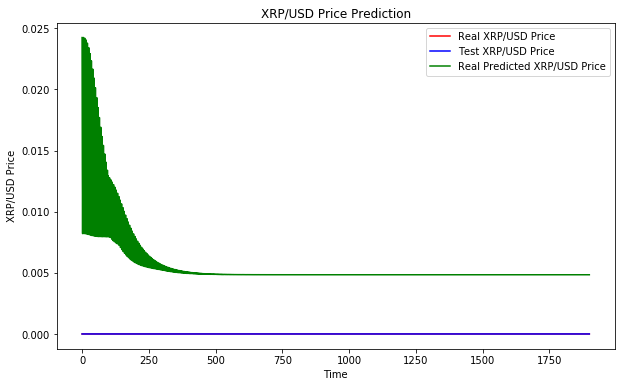

In [96]:
plt.figure(figsize=(10,6))
plt.plot(y_test, color = 'red', label = 'Real XRP/USD Price')
plt.plot(y_pred, color = 'blue', label = 'Test XRP/USD Price')
plt.plot(new_pred, color = 'green', label = 'Real Predicted XRP/USD Price')
plt.title('XRP/USD Price Prediction')
plt.xlabel('Time')
plt.ylabel('XRP/USD Price')
plt.legend()
plt.show()

In [0]:
#Make trades with Binance